In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglog import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv4 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')

In [3]:
bglog = BGLog(save_padded_num_sequences=False, load_from_pkl=True, )
train_test = bglog.get_tensor_train_test(ablation=1000)
train_data, test_data = train_test

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_padded_num_seq_df.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltk.pkl
train_0:, 800
test_0:, 200
train_1:, 800
test_1:, 200
train_2:, 800
test_2:, 200
train_3:, 800
test_3:, 102
4 class does not have 800 records, it has only 628 records
test_4:, 0
5 class does not have 800 records, it has only 165 records
5 class does not have 200 records, it has only 165 records
6 class does not have 800 records, it has only 75 records
6 class does not have 200 records, it has only 75 records
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>


In [4]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=4)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=test_data, epochs=1) 

vocab_size: 50
100/100 [==============================] - 11s 107ms/step - loss: 0.4636 - accuracy: 0.8128 - precision: 0.8919 - recall: 0.7347 - val_loss: 0.0431 - val_accuracy: 0.9866 - val_precision: 0.9896 - val_recall: 0.9866


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 1/50, train_loss: 4.322241306304932, eval_score: 0.7824207428241078


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 2/50, train_loss: 4.322242736816406, eval_score: 0.8257453154334624


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 3/50, train_loss: 4.322243690490723, eval_score: 0.8756533729114665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 4/50, train_loss: 4.322244167327881, eval_score: 0.9419678352349905


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 5/50, train_loss: 4.322249889373779, eval_score: 0.9448691976577046


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 6/50, train_loss: 4.322239875793457, eval_score: 0.9462373288088949


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 7/50, train_loss: 4.32224178314209, eval_score: 0.9470836370244331


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 8/50, train_loss: 4.322247505187988, eval_score: 0.9466696329118106


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 9/50, train_loss: 4.322247505187988, eval_score: 0.94606887700091


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 10/50, train_loss: 4.322247505187988, eval_score: 0.9457744773331638


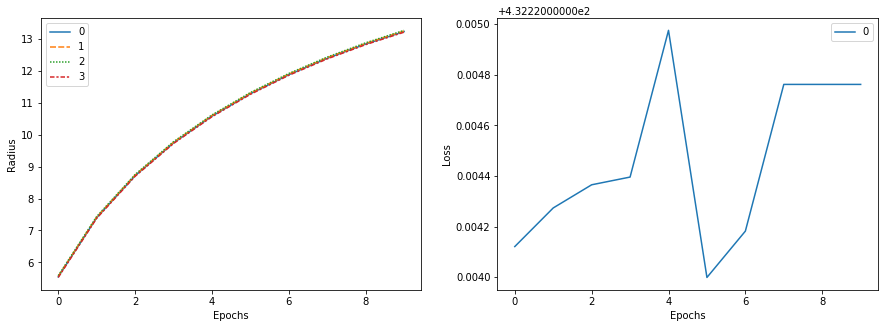

In [5]:
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate = 5, wait_patient=3)
# print(oset.radius_changes[0], oset.radius_changes[len(oset.radius_changes)-1])
# print(oset.openpredict(oset.features))

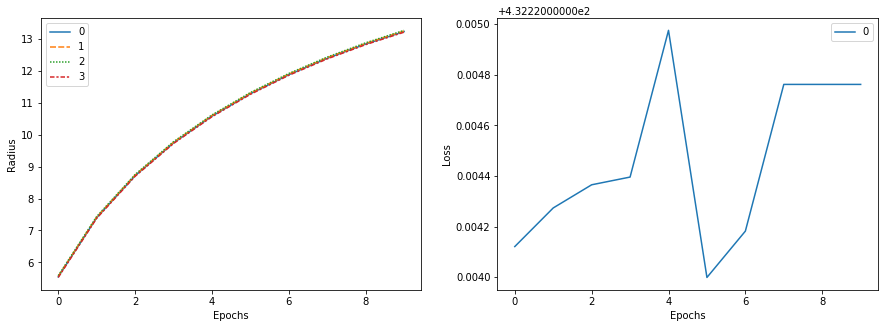

euc_dis: tf.Tensor(
[3.2082243 3.9535222 6.25775   1.4787966 2.4167542 2.451581  1.9447533
 9.176308  1.783878  2.284508  2.305532  5.003176  1.9216988 2.299017
 2.3401988 1.7088941 4.987301  3.8126132 7.639974  3.498002  4.6769657
 2.347791  1.3413188 6.411772  2.3392394 9.182841  2.695543  2.537008
 3.5050063 1.7020178 4.2338777 3.0080535], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[11.923993 11.884733 11.905436 11.923993 11.866987 11.884733 11.923993
 11.905436 11.866987 11.884733 11.884733 11.905436 11.866987 11.866987
 11.866987 11.866987 11.905436 11.866987 11.884733 11.923993 11.905436
 11.884733 11.866987 11.905436 11.884733 11.905436 11.866987 11.884733
 11.923993 11.866987 11.923993 11.923993], shape=(32,), dtype=float32)
predictions with unknown-9999: [2 0 1 2 3 0 2 1 3 0 0 1 3 3 3 3 1 3 0 2 1 0 3 1 0 1 3 0 2 3 2 2]


In [6]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)

In [7]:
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data)

[[799   0   0   0   1]
 [ 14 630   0   0 156]
 [  0   0 761  38   1]
 [  2   6  13 765  14]
 [  0   0   0   0   0]]
92.34
f1_weighted: 0.9470836370244331, f1_macro: 0.7576669096195463, f1_micro: 0.9234374999999999
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       800
           1       0.99      0.79      0.88       800
           2       0.98      0.95      0.97       800
           3       0.95      0.96      0.95       800
        9999       0.00      0.00      0.00         0

    accuracy                           0.92      3200
   macro avg       0.78      0.74      0.76      3200
weighted avg       0.98      0.92      0.95      3200



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 1/50, train_loss: 4.30214786529541, eval_score: 0.7229000786705848


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 2/50, train_loss: 4.302154541015625, eval_score: 0.795198472464461


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.26it/s]


epoch: 3/50, train_loss: 4.30216646194458, eval_score: 0.8222350530184585


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.28it/s]


epoch: 4/50, train_loss: 4.302157402038574, eval_score: 0.8542147794901856


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 5/50, train_loss: 4.302154064178467, eval_score: 0.8714488633801486


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 6/50, train_loss: 4.302151679992676, eval_score: 0.9184966635764656


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 7/50, train_loss: 4.302149295806885, eval_score: 0.9420736838243761


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 8/50, train_loss: 4.302154064178467, eval_score: 0.9436083006462375


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 9/50, train_loss: 4.302144527435303, eval_score: 0.943911829838111


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 10/50, train_loss: 4.302156925201416, eval_score: 0.9453141677132257


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 11/50, train_loss: 4.302149772644043, eval_score: 0.9459958275962503


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 12/50, train_loss: 4.302152633666992, eval_score: 0.9462373288088949


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.22it/s]


epoch: 13/50, train_loss: 4.302157402038574, eval_score: 0.9464763137536372


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.71it/s]


epoch: 14/50, train_loss: 4.30214786529541, eval_score: 0.9466724282533605


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.28it/s]


epoch: 15/50, train_loss: 4.302157402038574, eval_score: 0.9469194544356231


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.24it/s]


epoch: 16/50, train_loss: 4.302155017852783, eval_score: 0.9470836370244331


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 17/50, train_loss: 4.302147388458252, eval_score: 0.9471254470302227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 18/50, train_loss: 4.30214786529541, eval_score: 0.9466664005294548


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 19/50, train_loss: 4.302156448364258, eval_score: 0.9465133035033595


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 20/50, train_loss: 4.302146911621094, eval_score: 0.9465167455966419


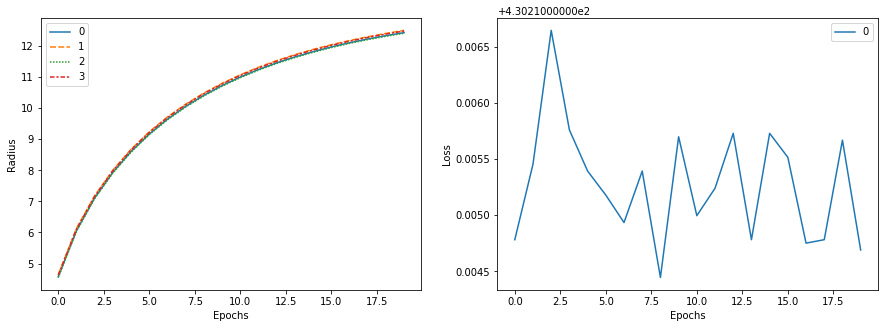

In [9]:
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate = 4, wait_patient=3)

In [10]:
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data)

euc_dis: tf.Tensor(
[ 2.716472   7.460153  20.044357   4.154325   2.5789754  7.6256237
  9.269767   2.619747   2.9801102  7.6940923  3.9535174  8.6576805
  1.9447798  2.7666442  7.7785     2.3976316  2.6576536  4.6769514
  9.201535   3.9535174  2.3477857  3.8635697  2.5625145  2.6062467
  3.1279976  1.6970799  2.406496   1.3456087  2.3152547  7.037901
  8.46645    2.5086348], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[12.156791 12.17884  12.17884  12.084997 12.105718 12.17884  12.156791
 12.105718 12.156791 12.17884  12.105718 12.17884  12.084997 12.084997
 12.105718 12.105718 12.156791 12.17884  12.17884  12.105718 12.105718
 12.156791 12.105718 12.084997 12.084997 12.156791 12.105718 12.156791
 12.105718 12.17884  12.17884  12.105718], shape=(32,), dtype=float32)
predictions with unknown-9999: [   3    1 9999    2    0    1    3    0    3    1    0    1    2    2
    0    0    3    1    1    0    0    3    0    2    2    3    0    3
    0    1    1    0]
[[799   0   0   0  

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 1/50, train_loss: 4.322241306304932, eval_score: 0.0018711025183607774


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 2/50, train_loss: 4.322242736816406, eval_score: 0.0018711025183607774


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 3/50, train_loss: 4.322243690490723, eval_score: 0.0018711025183607774


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 4/50, train_loss: 4.322244167327881, eval_score: 0.0018711025183607774


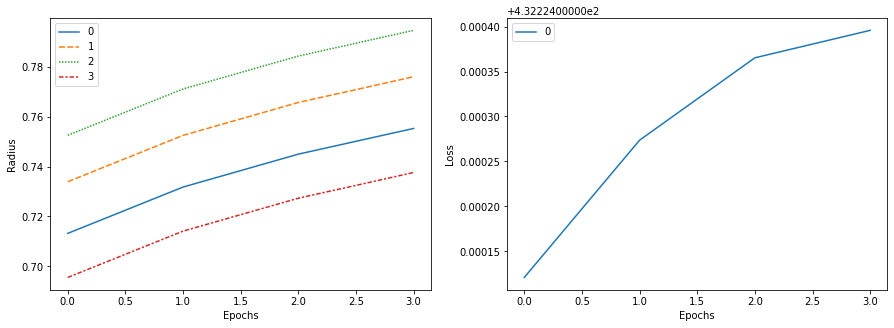

In [5]:
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate = 0.05, wait_patient=3)

In [6]:
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data)

euc_dis: tf.Tensor(
[ 2.4112515  1.956329   3.1475115  2.331269   2.9747133  7.040225
  7.999733   2.7836468  1.4896849 20.044342   3.7247143  2.0883439
  4.675914   3.0575078  3.0117922  1.8861457  2.389293   9.071592
  2.3599346  2.5024204  1.7570318  4.763347   4.2809553  2.849053
  2.0456574  2.6808474  1.8224634  2.451581   4.6769657  5.026187
  1.3821098  1.9244744], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[0.71323127 0.6955869  0.6955869  0.71323127 0.75250715 0.73392063
 0.73392063 0.75250715 0.6955869  0.73392063 0.6955869  0.71323127
 0.6955869  0.6955869  0.6955869  0.6955869  0.71323127 0.73392063
 0.6955869  0.71323127 0.6955869  0.71323127 0.75250715 0.75250715
 0.6955869  0.75250715 0.6955869  0.71323127 0.73392063 0.75250715
 0.6955869  0.6955869 ], shape=(32,), dtype=float32)
predictions with unknown-9999: [9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999
 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999 9999
 9999 9999 

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.21it/s]


epoch: 1/50, train_loss: 4.302146911621094, eval_score: 0.05650534981619037


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 2/50, train_loss: 4.3021650314331055, eval_score: 0.12260456702495319


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


epoch: 3/50, train_loss: 4.302155017852783, eval_score: 0.23085781015692625


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 4/50, train_loss: 4.302149295806885, eval_score: 0.33137033696641965


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 5/50, train_loss: 4.302153587341309, eval_score: 0.4349093062449114


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 6/50, train_loss: 4.302131175994873, eval_score: 0.4852499235100795


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 7/50, train_loss: 4.302145481109619, eval_score: 0.5171568794033508


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 8/50, train_loss: 4.302152633666992, eval_score: 0.5388477299591063


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 9/50, train_loss: 4.3021650314331055, eval_score: 0.5563520772765798


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.31it/s]


epoch: 10/50, train_loss: 4.302156448364258, eval_score: 0.5682041810815781


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 11/50, train_loss: 4.302151679992676, eval_score: 0.5790411865110551


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


epoch: 12/50, train_loss: 4.302149772644043, eval_score: 0.5850122899215995


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.24it/s]


epoch: 13/50, train_loss: 4.302148342132568, eval_score: 0.5914041791651568


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 14/50, train_loss: 4.302152633666992, eval_score: 0.5955958734999549


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 15/50, train_loss: 4.302143573760986, eval_score: 0.6022185375842741


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 16/50, train_loss: 4.302155017852783, eval_score: 0.6050392915135493


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.40it/s]


epoch: 17/50, train_loss: 4.302148818969727, eval_score: 0.6084509992226635


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 18/50, train_loss: 4.302150726318359, eval_score: 0.612028891448577


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 19/50, train_loss: 4.302156448364258, eval_score: 0.6142262415501046


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 20/50, train_loss: 4.3021464347839355, eval_score: 0.6157382852970608


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 21/50, train_loss: 4.302156448364258, eval_score: 0.6191267213828483


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 22/50, train_loss: 4.302153587341309, eval_score: 0.6217134717295094


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.35it/s]


epoch: 23/50, train_loss: 4.302145481109619, eval_score: 0.6237291131065956


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.18it/s]


epoch: 24/50, train_loss: 4.3021464347839355, eval_score: 0.6260803133887625


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


epoch: 25/50, train_loss: 4.302155494689941, eval_score: 0.6269788684072464


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 26/50, train_loss: 4.302145481109619, eval_score: 0.6286972501825803


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 27/50, train_loss: 4.302161693572998, eval_score: 0.6298309252862143


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 28/50, train_loss: 4.302158355712891, eval_score: 0.6307999052107671


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 29/50, train_loss: 4.302156448364258, eval_score: 0.6322421340311862


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.42it/s]


epoch: 30/50, train_loss: 4.302147388458252, eval_score: 0.6333169737425056


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 31/50, train_loss: 4.3021559715271, eval_score: 0.6333169737425056


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.22it/s]


epoch: 32/50, train_loss: 4.302151203155518, eval_score: 0.6335553073141725


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 33/50, train_loss: 4.30215311050415, eval_score: 0.6337932733706942


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 34/50, train_loss: 4.302141189575195, eval_score: 0.6340308727614894


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 35/50, train_loss: 4.3021559715271, eval_score: 0.6346699306156025


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 36/50, train_loss: 4.3021559715271, eval_score: 0.6351433036767699


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 37/50, train_loss: 4.302145004272461, eval_score: 0.6351433036767699


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 38/50, train_loss: 4.3021464347839355, eval_score: 0.6358157091349967


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 39/50, train_loss: 4.302149772644043, eval_score: 0.6365208788517184


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 40/50, train_loss: 4.30215311050415, eval_score: 0.6365208788517184


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 41/50, train_loss: 4.302150249481201, eval_score: 0.6371553370831516


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 42/50, train_loss: 4.302141189575195, eval_score: 0.6371553370831516


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 43/50, train_loss: 4.30215311050415, eval_score: 0.6371553370831516


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 44/50, train_loss: 4.30215311050415, eval_score: 0.6373549737444282


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 45/50, train_loss: 4.302157878875732, eval_score: 0.6375543286320119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 46/50, train_loss: 4.302147388458252, eval_score: 0.6375543286320119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.38it/s]


epoch: 47/50, train_loss: 4.302150726318359, eval_score: 0.6375543286320119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.24it/s]


epoch: 48/50, train_loss: 4.302161693572998, eval_score: 0.6375543286320119


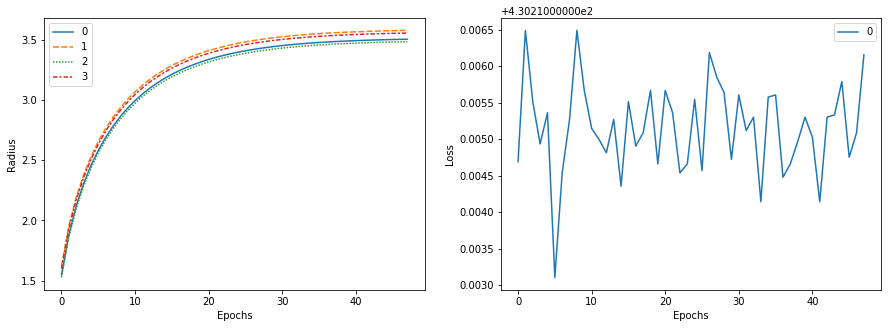

euc_dis: tf.Tensor(
[ 4.2733126  1.6987015  9.692382   1.936476  20.044357   9.269789
  2.5162218  1.7906216  3.235638   1.7944722  1.4679031  9.234731
  1.7509671  9.373414   3.2572072  2.716459   2.6900578  6.5524707
  6.929062   5.289791  10.314722   2.2698965 20.044357   3.953517
  3.8635757  8.346038   3.1994216 20.044357   7.283863   2.235471
  2.07741   20.044357 ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[3.4786186 3.55056   3.5728102 3.4786186 3.5728102 3.55056   3.4994552
 3.55056   3.4786186 3.4786186 3.55056   3.5728102 3.4786186 3.5728102
 3.4786186 3.55056   3.55056   3.4994552 3.55056   3.4994552 3.5728102
 3.4994552 3.5728102 3.4994552 3.55056   3.5728102 3.55056   3.5728102
 3.5728102 3.4994552 3.55056   3.5728102], shape=(32,), dtype=float32)
predictions with unknown-9999: [9999    3 9999    2 9999 9999    0    3    2    2    3 9999    2 9999
    2    3    3 9999 9999 9999 9999    0 9999 9999 9999 9999    3 9999
 9999    0    3 9999]
[[600   0   0   0 200]

In [7]:
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate = 0.9, wait_patient=3)
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data)

In [9]:
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate = 3, wait_patient=3)
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.27it/s]


epoch: 1/50, train_loss: 4.3025970458984375, eval_score: 0.6496311507021256


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [00:09<00:04,  7.11it/s]


KeyboardInterrupt: 